# Importing Data

In [1]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import io

auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/churn.csv')

# EDA

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Get the size of the dataset
df.shape

(10000, 14)

In [ ]:
# Get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Get summary statistics of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Count unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [ ]:
# Isolate the categorical variables
categorical_variables = [col for col in df.columns if df[col].nunique() <= 11 and col not in "Exited"]
categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
# Isolate the numerical variables
numerical_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() > 11
                        and col not in "CustomerId"
                        and col not in "RowNumber"]
numerical_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# Get the count of values of the dependent variable
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Churn in the dataset (`Exited = 1`) only makes ~20% of the dataset.  
This is a clear imbalanced data that can affect the performance of the prediction model.

In [ ]:
# Customers who left the bank
churn = df.loc[df["Exited"]==1]
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [ ]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]
not_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


<ipython-input-7-f7c6f93bfcac>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = df.corr().nlargest(k, 'Exited')['Exited'].index


<Axes: >

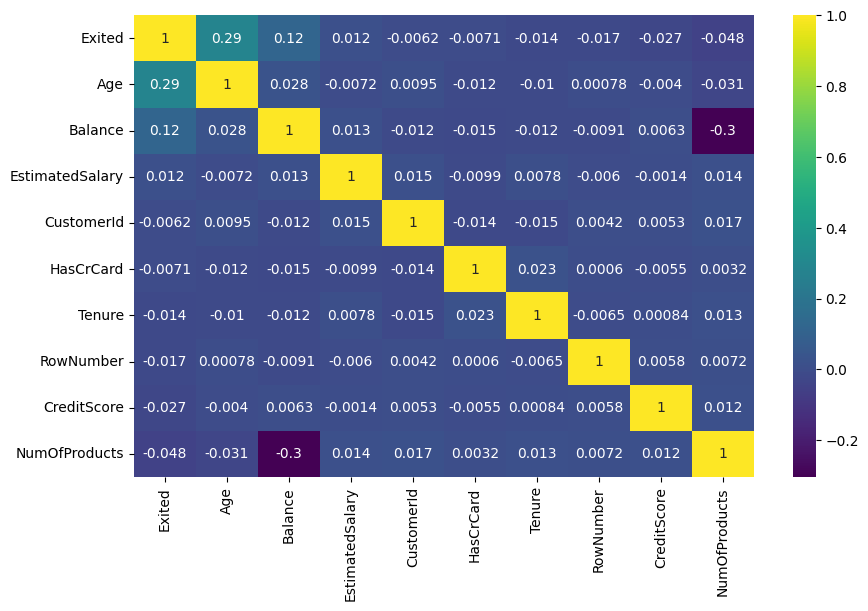

In [ ]:
# Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

k = 10 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Data Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
# Drop columns that do not affect the dependent variable
df_prepared = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Feature Engineering

In [4]:
# Encoding categorical variables which type are string
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df_prepared['Gender'])
df_prepared['Gender'] = label_encoder.transform(df_prepared['Gender'])

label_encoder.fit(df_prepared['Geography'])
df_prepared['Geography'] = label_encoder.transform(df_prepared['Geography'])

df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
df_prepared[numerical_variables] = mmscaler.fit_transform(df_prepared[numerical_variables])
df_prepared.head()

NameError: ignored

# Modeling

In [6]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df_prepared.drop("Exited", axis=1)
y = df_prepared["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [30]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [31]:
# Evaluating the model with Confusion Matrix
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  20
True Negative :  1559
False Positive:  388
False Negative:  33


In [32]:
# Evaluating the model with performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (logreg_accuracy * 100.0))
print("Precision: %.2f%%" % (logreg_precision * 100.0))
print("Recall: %.2f%%" % (logreg_recall * 100.0))
print("F1 Score: %.2f%%" % (logreg_f1 * 100.0))

Accuracy: 78.95%
Precision: 37.74%
Recall: 4.90%
F1 Score: 8.68%


## Decision Tree

In [33]:
# Train the model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [34]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  191
True Negative :  1389
False Positive:  217
False Negative:  203


In [35]:
# Evaluating the model with performance metrics

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("Precision: %.2f%%" % (dt_precision * 100.0))
print("Recall: %.2f%%" % (dt_recall * 100.0))
print("F1 Score: %.2f%%" % (dt_f1 * 100.0))

Accuracy: 79.00%
Precision: 48.48%
Recall: 46.81%
F1 Score: 47.63%


## Random Forest

In [36]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [37]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  180
True Negative :  1538
False Positive:  228
False Negative:  54


In [38]:
# Evaluating the model with performance metrics

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print("Precision: %.2f%%" % (rf_precision * 100.0))
print("Recall: %.2f%%" % (rf_recall * 100.0))
print("F1 Score: %.2f%%" % (rf_f1 * 100.0))

Accuracy: 85.90%
Precision: 76.92%
Recall: 44.12%
F1 Score: 56.07%


## XGBoost

In [39]:
# Train the model

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [40]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  201
True Negative :  1521
False Positive:  207
False Negative:  71


In [41]:
# Evaluating the model with performance metrics

xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (xg_accuracy * 100.0))
print("Precision: %.2f%%" % (xg_precision * 100.0))
print("Recall: %.2f%%" % (xg_recall * 100.0))
print("F1 Score: %.2f%%" % (xg_f1 * 100.0))

Accuracy: 86.10%
Precision: 73.90%
Recall: 49.26%
F1 Score: 59.12%


## Comparing Models

In [45]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
        ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
        ['Random Forest', rf_accuracy, rf_precision, rf_recall, rf_f1],
        ['XGBoost', xg_accuracy, xg_precision, xg_recall, xg_f1]
    ],
    columns = ['model', 'accuracy', 'precision', 'recall', 'f1_score']
)

compare.style.highlight_max(color="green")

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.789500,0.377358,0.049020,0.086768
1,Decision Tree,0.790000,0.484772,0.468137,0.476309
2,Random Forest,0.859000,0.769231,0.441176,0.560748
3,XGBoost,0.861000,0.738971,0.492647,0.591176


`XGBoost` performs the best in terms of Accuracy, Recall, and F1 Score.  
Therefore at this point it is recommended to use `XGBoost` to predict churn.